In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import random as rd
import numpy as np
import math

In [2]:
fam_data = pd.read_csv('C:/Users/rifle/Documents/My Docs/Concordia/2 - Winter 2020/INDU 6361 - Discrete Optimization/Project/Data/family_data.csv')
display(fam_data.head())

,family_id,choice_0,choice_1,choice_2,choice_3,choice_4,choice_5,choice_6,choice_7,choice_8,choice_9,n_people
0,0,52,38,12,82,33,75,64,76,10,28,4
1,1,26,4,82,5,11,47,38,6,66,61,4
2,2,100,54,25,12,27,82,10,89,80,33,3
3,3,2,95,1,96,32,6,40,31,9,59,2
4,4,53,1,47,93,26,3,46,16,42,39,4


In [3]:
I = len(fam_data.index)     #number of families
J = 10                      #number of choices
K = 100                     #number of days

n_people = fam_data['n_people'].to_numpy()
family_id = fam_data['family_id'].to_numpy()

choice = 0
choices = fam_data.iloc[:,1:11].to_numpy()
c = np.empty([I,K])
c[:] = -1
x = np.zeros([I,K])


for i in range(I):
    choice = fam_data.choice_0[i] -1
    c[i][choice] = 0
    choice = fam_data.choice_1[i] -1
    c[i][choice] = 50
    choice = fam_data.choice_2[i] -1
    c[i][choice] = 50 + 9*n_people[i]
    choice = fam_data.choice_3[i] -1
    c[i][choice] = 100 + 9*n_people[i]
    choice = fam_data.choice_4[i] -1
    c[i][choice] = 200 + 9*n_people[i]
    choice = fam_data.choice_5[i] -1
    c[i][choice] = 200 + 18*n_people[i]
    choice = fam_data.choice_6[i] -1
    c[i][choice] = 300 + 18*n_people[i]
    choice = fam_data.choice_7[i] -1
    c[i][choice] = 400 + 36*n_people[i]
    choice = fam_data.choice_8[i] -1
    c[i][choice] = 500 + 36*n_people[i]
    choice = fam_data.choice_9[i] -1
    c[i][choice] = 500 + 36*n_people[i] + 199*n_people[i]
    choice = 500 + 36*n_people[i] + 398*n_people[i]                           
    for k in range(K):
        if c[i][k] == -1:
            c[i][k] = choice 

In [4]:
def total_cost2(a=None,b=None, reverse = False, swap = False):
    if a is not None and b is not None:
        acc_cost_a = ((peeps[a] - 125)/400) * (peeps[a]**(0.5 + abs(peeps[a] - peeps[min(99,a+1)])/50))
        acc_cost_b = ((peeps[b] - 125)/400) * (peeps[b]**(0.5 + abs(peeps[b] - peeps[min(99,b+1)])/50))
        acc_cost_dict[a] = acc_cost_a
        acc_cost_dict[b] = acc_cost_b
        if reverse:
            pref_cost_dict[a] += c[fam1][a]
            pref_cost_dict[b] -= c[fam1][b]
            if swap:
                pref_cost_dict[a] -= c[fam2][a]
                pref_cost_dict[b] += c[fam2][b]
        else:
            pref_cost_dict[a] -= c[fam1][a]
            pref_cost_dict[b] += c[fam1][b]
            if swap:
                pref_cost_dict[a] += c[fam2][a]
                pref_cost_dict[b] -= c[fam2][b]
        if a != 0:
            cost_a1 = ((peeps[a-1] - 125)/400) * (peeps[a-1]**(0.5 + abs(peeps[a-1] - peeps[min(99,a)])/50))
            acc_cost_dict[a-1] = cost_a1
        if b != 0:
            cost_b1 = ((peeps[b-1] - 125)/400) * (peeps[b-1]**(0.5 + abs(peeps[b-1] - peeps[min(99,b)])/50))
            acc_cost_dict[b-1] = cost_b1
        cost = sum(acc_cost_dict.values()) + sum(pref_cost_dict.values())
    else:
        cost = sum(acc_cost_dict.values()) + sum(pref_cost_dict.values())
    return cost

def plot_peeps(a=None, xlabel = None, ylabel = None, title = None):
    plt.figure(figsize=(20,5))
    plt.bar(range(len(peeps)), list(peeps.values()), align='center')
    plt.plot(range(100),[125]*100, color='r')
    plt.plot(range(100),[300]*100, color='r')
    if xlabel and ylabel and title:
        plt.xlabel(xlabel,fontsize = 15)
        plt.ylabel(ylabel,fontsize = 15)
        plt.title(title,fontsize = 17,y=1.03)
    plt.xticks(range(len(peeps)), list(peeps.keys()), rotation = 90)
    if a:
        plt.savefig(a +'.png')
    plt.show()

771739.6947636415


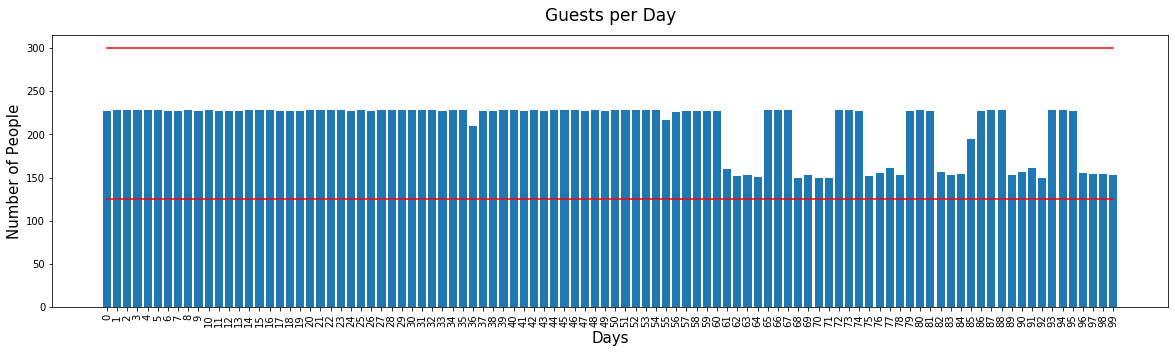

In [5]:
peeps = {}
x = np.zeros([I,K])
submission = {}
assignments = {}
totcust = {}

for k in range(K):
    peeps[k] = 0
    assignments[k] = []
s = 0

for k in range(K):
    peeps[k] = 0
for i in range(I):
    j = 0
    a = choices[i][j] - 1
    while peeps[a] + n_people[i] >= 229:
        j += 1
        if j >= 10:
            a = min(peeps, key=peeps.get)
        else:
            a = choices[i][j] - 1
    peeps[a] += n_people[i]
    assignments[a].append(i)
    x[i][a] = 1
    submission[i] = a

acc_cost_dict = {}
for i in range(K):
    acc_cost_dict[i] = 0
    acc_cost_dict[i] = ((peeps[i] - 125)/400) * (peeps[i]**(0.5 + abs(peeps[i] - peeps[min(99,i+1)])/50))

pref_cost_dict = {}
for k in range(K):
    pref_cost_dict[k] = 0
    for i in range(I):
        pref_cost_dict[k] += x[i,k]*c[i,k] 
    
print(total_cost2())
plot_peeps('229limit','Days', 'Number of People', 'Guests per Day')
best_solution = total_cost2()

In [8]:
np.random.seed(0)
unsuccessful = 0
iterations = 0
cost_list = []
############### swap and move based on day

while unsuccessful < 2000:
    for i in range(K):
        if iterations%100 == 0:
            cost_list.append(total_cost2())
        old_cost = total_cost2()
        fam1 = rd.choice(np.where(x[:,i]==1)[0])
        new_day = rd.choice(choices[fam1]) - 1
        while new_day == i:
            new_day = np.random.randint(0,K)
        fam2 = rd.choice(np.where(x[:,new_day]==1)[0])

        x[fam1][i] = 0
        x[fam1][new_day] = 1
        x[fam2][new_day] = 0
        x[fam2][i] = 1
        peeps[i] = peeps[i] - n_people[fam1] + n_people[fam2]
        peeps[new_day] = peeps[new_day] + n_people[fam1] - n_people[fam2]
        new_cost = total_cost2(i,new_day,swap=True)
        if unsuccessful > 2000:
            break
        if new_cost < old_cost and 125 <= peeps[i] <= 300 and 125 <= peeps[new_day] <= 300:
            unsuccessful = 0
        else:
            x[fam2][i] = 0
            x[fam2][new_day] = 1
            x[fam1][new_day] = 0
            x[fam1][i] = 1
            peeps[new_day] = peeps[new_day] - n_people[fam1] + n_people[fam2]
            peeps[i] = peeps[i] + n_people[fam1] - n_people[fam2]
            total_cost2(i,new_day,reverse=True, swap=True)
            unsuccessful += 1
            
        fam1 = rd.choice(np.where(x[:,i]==1)[0])
        old_cost = total_cost2()
        new_day = rd.choice(choices[fam1]) - 1
        x[fam1][i] = 0
        x[fam1][new_day] = 1
        peeps[i] -= n_people[fam1]
        peeps[new_day] += n_people[fam1]
        new_cost = total_cost2(i,new_day)
        if new_cost < old_cost and 125 <= peeps[i] <= 300 and 125 <= peeps[new_day] <= 300:
            unsuccessful = 0
            iterations +=1
            continue
        else:
            x[fam1][new_day] = 0
            x[fam1][i] = 1
            peeps[i] += n_people[fam1]
            peeps[new_day] -= n_people[fam1]
            total_cost2(i,new_day,reverse=True)
            unsuccessful += 1
        iterations += 1

print(total_cost2())

141085.3272230728


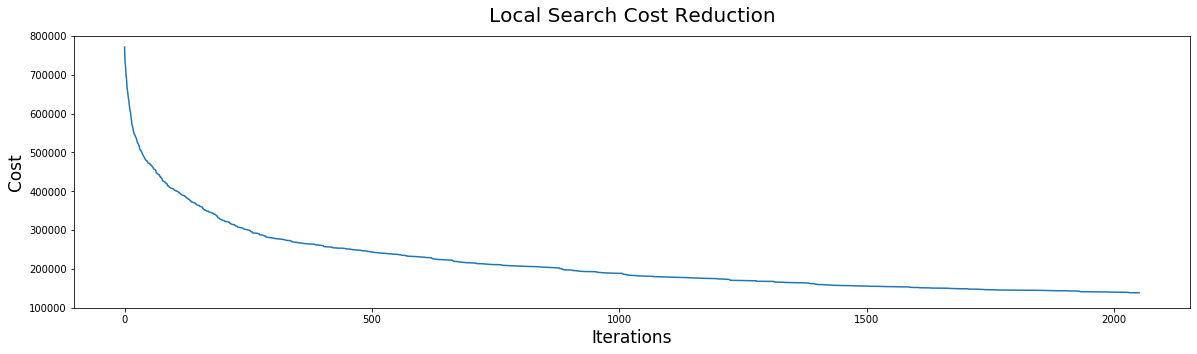

In [9]:
plt.figure(figsize=(20,5))
plt.plot(range(len(cost_list)), cost_list)
plt.xlabel('Iterations',fontsize = 17)
plt.ylabel('Cost',fontsize = 17)
plt.title('Local Search Cost Reduction',fontsize = 20,y=1.03)
plt.ylim([100000,800000])

plt.savefig('LocalSearch.png')
plt.show()

In [ ]:
np.random.seed(0)
unsuccessful = 0
temp = 100000
T = 100000
iterations = 0
k = 0
best_assignment = np.zeros([I,K])
cost_list2 = [total_cost2()]


############### Annealing based on day

while k < 10:
    for i in range(K):
        if iterations%100 == 0:
            cost_list.append(total_cost2())
        old_cost = total_cost2()
        fam1 = rd.choice(np.where(x[:,i]==1)[0])
#         new_day = np.random.randint(0,K)
        new_day = rd.choice(choices[fam1]) - 1
        while new_day == i:
            new_day = np.random.randint(0,K)
        fam2 = rd.choice(np.where(x[:,new_day]==1)[0])

        x[fam1][i] = 0
        x[fam1][new_day] = 1
        x[fam2][new_day] = 0
        x[fam2][i] = 1
        peeps[i] = peeps[i] - n_people[fam1] + n_people[fam2]
        peeps[new_day] = peeps[new_day] + n_people[fam1] - n_people[fam2]
        new_cost = total_cost2(i,new_day,swap=True)
        if unsuccessful > 2000:
            temp = temp/2
            T = copy.deepcopy(temp)
            k += 1
            unsuccessful = 0
            if k > 10:
                break
        if 125 <= peeps[i] <= 300 and 125 <= peeps[new_day] <= 300:
            if new_cost < old_cost:
                unsuccessful = 0
                if best_solution > new_cost:
                    best_solution = new_cost
                    best_assignment = x
                
            else:
                P = math.exp((-(new_cost - best_solution))/T)
                r = rd.uniform(0,1)
                if P <= r:
                    x[fam2][i] = 0
                    x[fam2][new_day] = 1
                    x[fam1][new_day] = 0
                    x[fam1][i] = 1
                    peeps[new_day] = peeps[new_day] - n_people[fam1] + n_people[fam2]
                    peeps[i] = peeps[i] + n_people[fam1] - n_people[fam2]
                    total_cost2(i,new_day,reverse=True, swap=True)
                    unsuccessful += 1
        else:
            x[fam2][i] = 0
            x[fam2][new_day] = 1
            x[fam1][new_day] = 0
            x[fam1][i] = 1
            peeps[new_day] = peeps[new_day] - n_people[fam1] + n_people[fam2]
            peeps[i] = peeps[i] + n_people[fam1] - n_people[fam2]
            total_cost2(i,new_day,reverse=True, swap=True)
            unsuccessful += 1

        fam1 = rd.choice(np.where(x[:,i]==1)[0])
        old_cost = total_cost2()
        new_day = rd.choice(choices[fam1]) - 1
        x[fam1][i] = 0
        x[fam1][new_day] = 1
        peeps[i] -= n_people[fam1]
        peeps[new_day] += n_people[fam1]
        new_cost = total_cost2(i,new_day)
        if 125 <= peeps[i] <= 300 and 125 <= peeps[new_day] <= 300:
            if new_cost < old_cost:
                unsuccessful = 0
                if best_solution > new_cost:
                    best_solution = new_cost
                    best_assignment = x
                
            else:
                P = math.exp((-(new_cost - best_solution))/T)
                r = rd.uniform(0,1)
                if P <= r:
                    x[fam1][new_day] = 0
                    x[fam1][i] = 1
                    peeps[i] += n_people[fam1]
                    peeps[new_day] -= n_people[fam1]
                    total_cost2(i,new_day,reverse=True)
                    unsuccessful += 1
        else:
            x[fam1][new_day] = 0
            x[fam1][i] = 1
            peeps[i] += n_people[fam1]
            peeps[new_day] -= n_people[fam1]
            total_cost2(i,new_day,reverse=True)
            unsuccessful += 1
        iterations += 1
        if iterations%2000 == 0:
            T = T/2        

print(total_cost2())

In [ ]:
plot_peeps('annealingsolution', 'Days', "People", "People per Day")

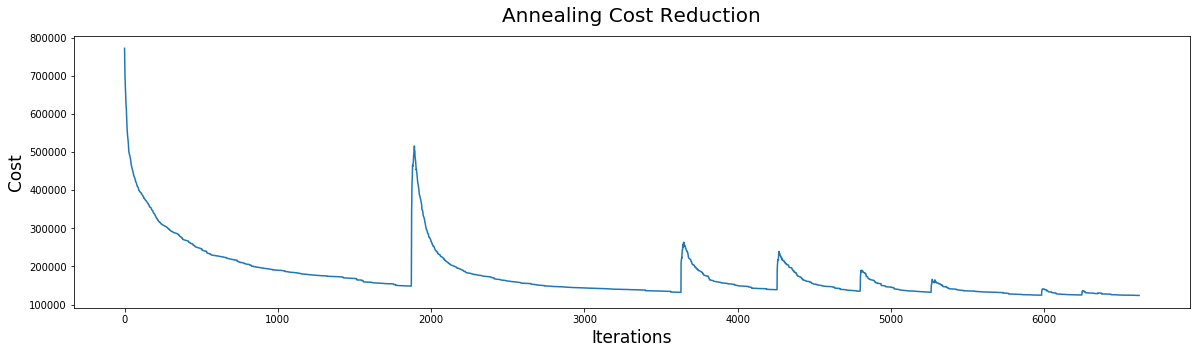

In [28]:
plt.figure(figsize=(20,5))
plt.plot(range(len(cost_list)), cost_list)
plt.xlabel('Iterations',fontsize = 17)
plt.ylabel('Cost',fontsize = 17)
plt.title('Annealing Cost Reduction',fontsize = 20,y=1.03)

plt.savefig('Annealing2.png')
plt.show()

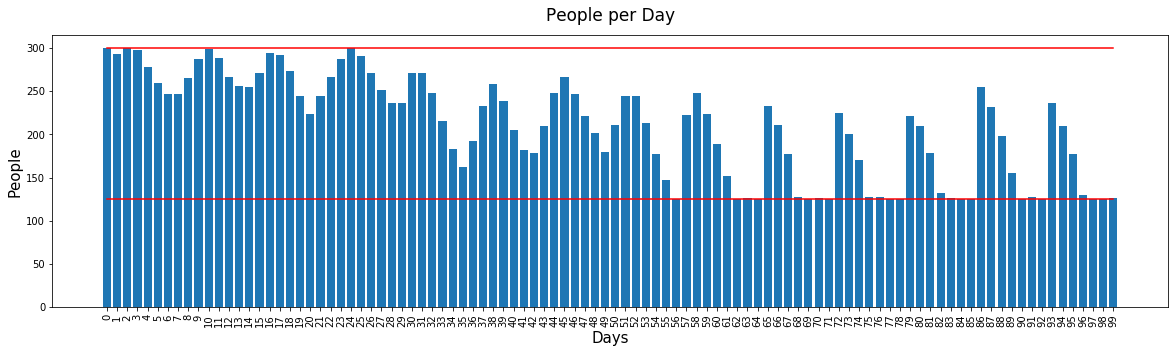

In [30]:
plot_peeps('annealingsolution', 'Days', "People", "People per Day")